In [2]:
import numpy as np, matplotlib.pyplot as plt
from collections import OrderedDict as od
from scipy.special import comb as C

In [3]:
def get_DOS(N):
    DOS = od()
    Z = 0
    for k in range(0, N + 1, 2):
        DOS[-k] = C(N, k)
        Z += C(N, k)
    for k in range(0, N + 1, 2):
        DOS[-k] /= Z
    return DOS

In [4]:
data = {}
N = 400
name = "./datasets/1DIsingSpreadDynamics_N{}_R1048576_run0e.txt".format(N)
with open(name, "r") as f:
    for line in f:
        time = int(line.split()[0])
        array = od()
        E = 0
        for x in map(int, line.split()[1:]):
            array[E] = x;
            E -= 1
        data[time] = array

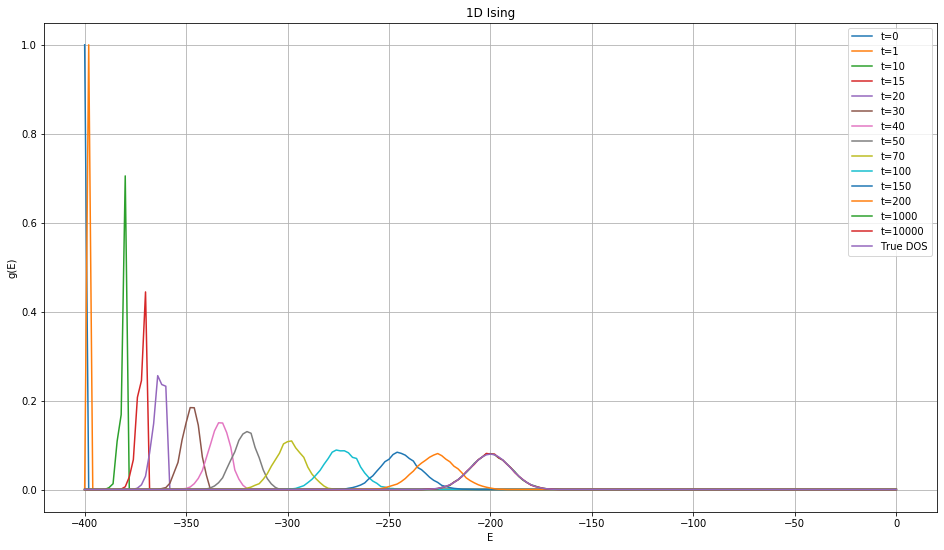

In [5]:
plt.figure(figsize=(16, 9))
trueDOS = get_DOS(N)
for t in [0, 1, 10, 15, 20, 30, 40, 50, 70, 100, 150, 200, 1000, 10000]:
    Z = sum([data[t][x] for x in data[t] if x % 2 == 0])
    plt.plot([x for x in data[t] if x % 2 == 0], [data[t][x] / Z for x in data[t] if x % 2 == 0], '-', label="t={}".format(t))

plt.plot([x for x in trueDOS if x % 2 == 0], [trueDOS[x] for x in trueDOS if x % 2 == 0], '-', label="True DOS")
plt.grid()
plt.legend()
plt.title("1D Ising")
plt.xlabel("E")
plt.ylabel("g(E)")
plt.savefig("4.png")

In [153]:
abs_diff = od()
sq_diff = od()

In [154]:
for t in range(0, 1000):
    res = 0
    sq_res = 0
    for x in trueDOS:
        Z = sum([data[t][x] for x in data[t] if x % 2 == 0])
        res += abs(trueDOS[x] - data[t][x] / Z)
        sq_res += (trueDOS[x] - data[t][x] / Z) ** 2
    abs_diff[t] = res
    sq_diff[t] = sq_res

In [155]:
trueDOS

OrderedDict([(0, 7.745183829697649e-121),
             (-2, 6.180656696098724e-116),
             (-4, 8.1381736826981255e-112),
             (-6, 4.2432437581588025e-108),
             (-8, 1.1732720535729024e-104),
             (-10, 1.9981083799469542e-101),
             (-12, 2.296462290316306e-98),
             (-14, 1.8946570970589854e-95),
             (-16, 1.1731874633080659e-92),
             (-18, 5.638661000119081e-90),
             (-20, 2.159636840209484e-87),
             (-22, 6.73227051356988e-85),
             (-24, 1.7380234453022054e-82),
             (-26, 3.770173935194236e-80),
             (-28, 6.956968310944532e-78),
             (-30, 1.1036150695749324e-75),
             (-32, 1.5189169904135528e-73),
             (-34, 1.828332023683694e-71),
             (-36, 1.938467262253052e-69),
             (-38, 1.8217180390903463e-67),
             (-40, 1.526062543489552e-65),
             (-42, 1.1453445012813385e-63),
             (-44, 7.736886856804753e-62),
 

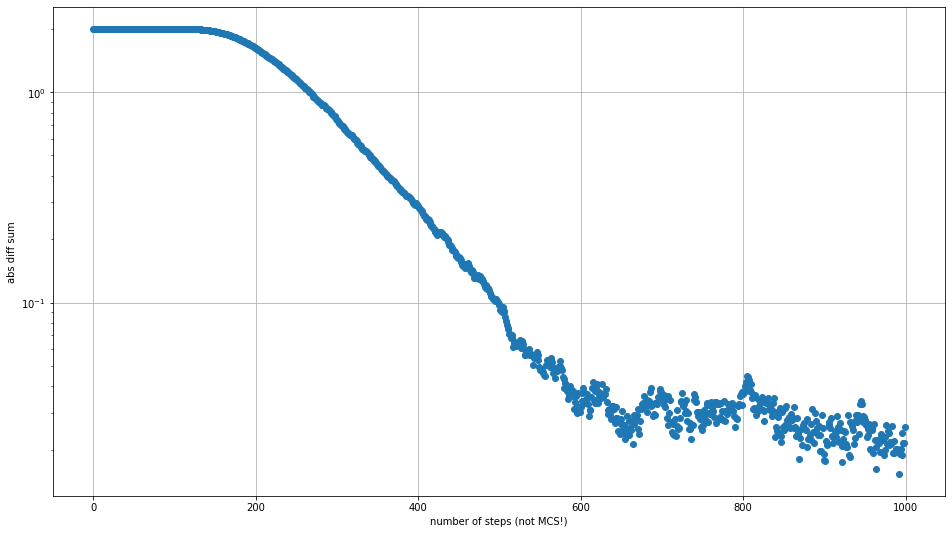

In [156]:
plt.figure(figsize=(16, 9))
plt.plot([t for t in abs_diff], [res for t, res in abs_diff.items()], 'o', label="{}".format(t))
plt.grid()
plt.xlabel("number of steps (not MCS!)")
plt.ylabel("abs diff sum")
plt.yscale("log")
#plt.legend()
plt.show()

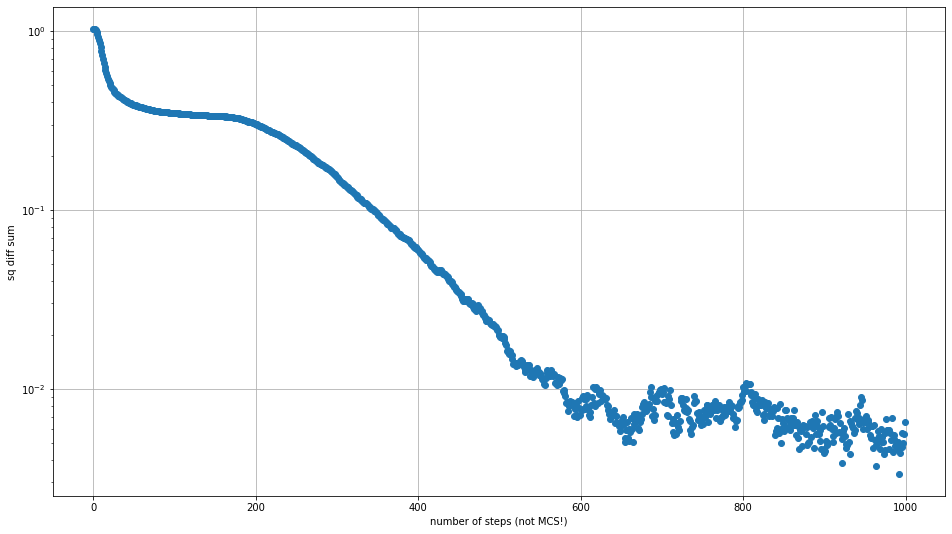

In [157]:
plt.figure(figsize=(16, 9))
plt.plot([t for t in sq_diff], [np.sqrt(res) for t, res in sq_diff.items()], 'o', label="{}".format(t))
plt.grid()
plt.xlabel("number of steps (not MCS!)")
plt.ylabel("sq diff sum")
plt.yscale("log")
#plt.legend()
plt.show()